<a href="https://colab.research.google.com/github/sergiorez/freezer/blob/main/freezer_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Loading data

In [2]:
data = pd.read_csv('freezer_data.csv')

In [3]:
print(data)

                     time  temperature
0     2023-10-23 18:42:00       -16.69
1     2023-10-23 18:43:00       -16.69
2     2023-10-23 18:44:00       -16.69
3     2023-10-23 18:45:00       -16.75
4     2023-10-23 18:46:00       -16.81
...                   ...          ...
8689  2023-10-29 19:31:00       -18.62
8690  2023-10-29 19:32:00       -18.94
8691  2023-10-29 19:33:00       -19.06
8692  2023-10-29 19:34:00       -18.94
8693  2023-10-29 19:35:00       -18.81

[8694 rows x 2 columns]


Showing compressor cycles and defrost peaks

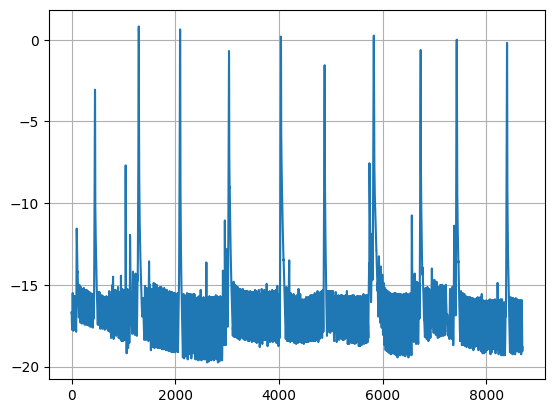

In [4]:
plt.plot(data['temperature'])
plt.grid()

In [5]:
print('Average Temperature:', round(data['temperature'].mean(), 1), '°C')

Average Temperature: -16.6 °C


'time' column to datetime format

In [6]:
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')

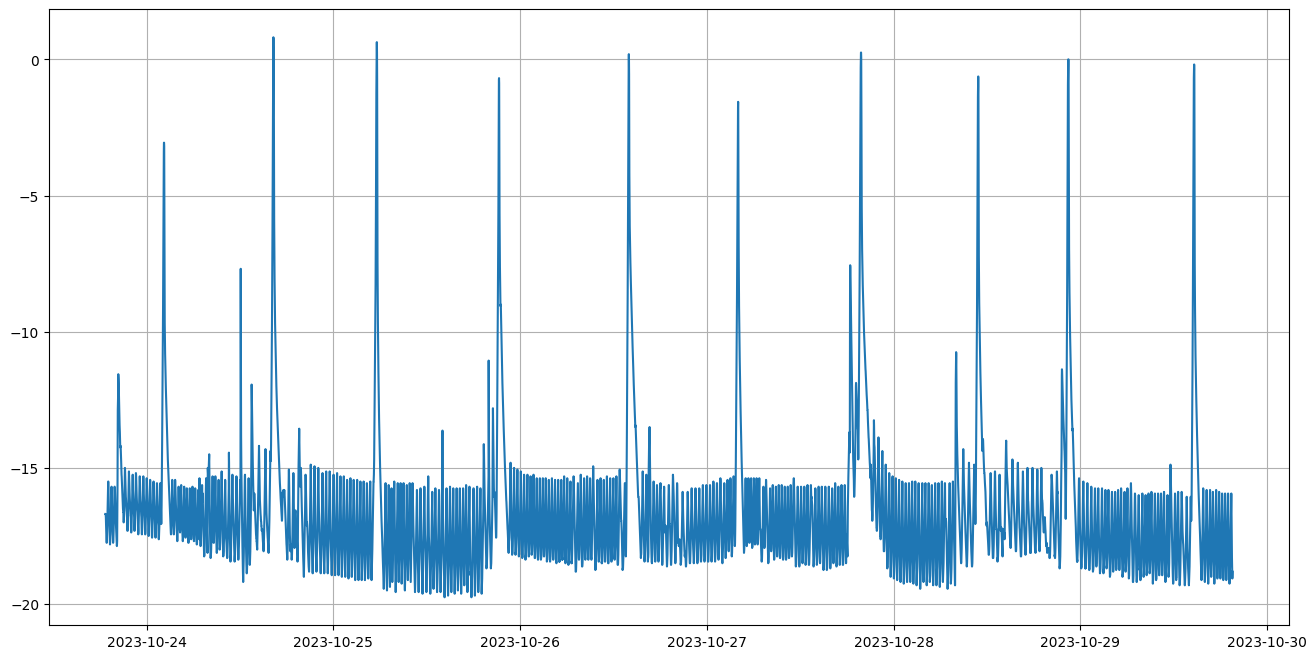

In [7]:
plt.figure(figsize=(16, 8))
plt.plot(data['time'], data['temperature'])
plt.grid()

Finding defrost peaks

In [8]:
peaks, _ = find_peaks(data['temperature'], height=-5)

In [9]:
print(peaks)

[ 452 1296 2093 3036 4037 4880 5827 6731 7426 8396]


In [10]:
print('Numer of peaks:', len(peaks))

Numer of peaks: 10


Plotting peaks values

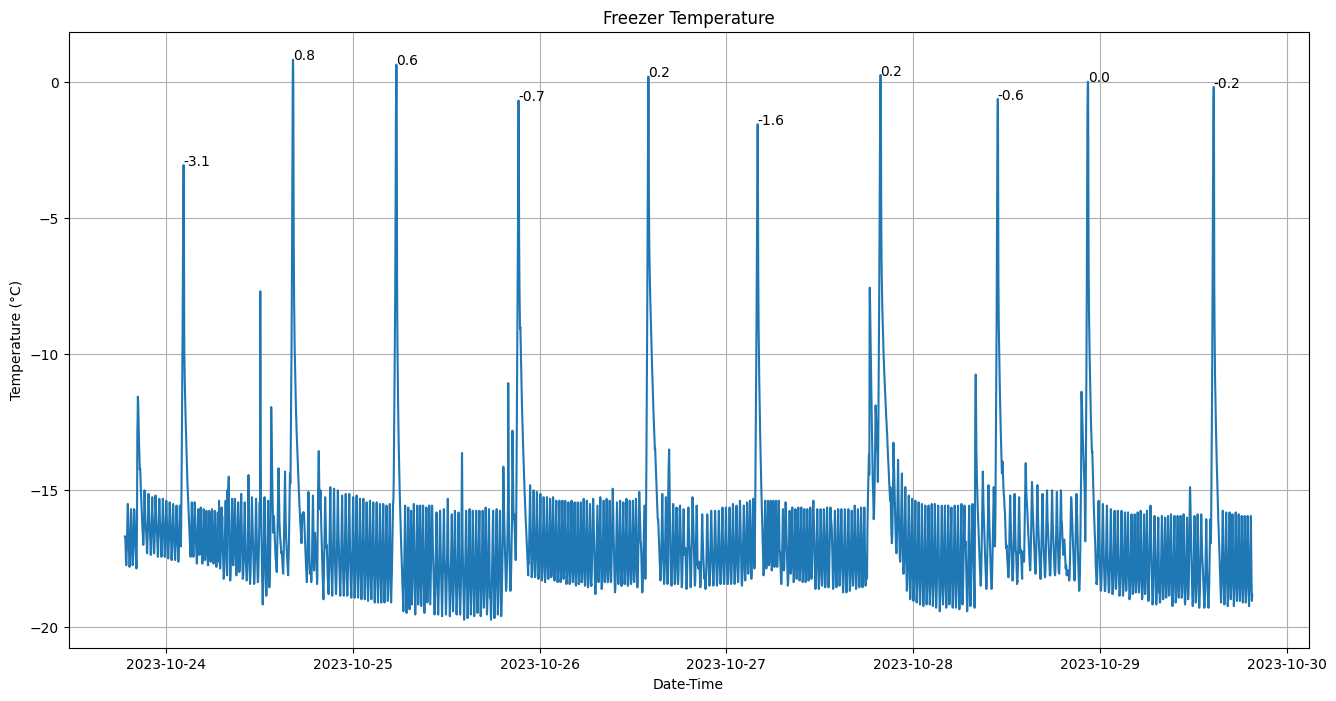

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(data['time'], data['temperature'])
plt.title('Freezer Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date-Time')
plt.grid()
for peak in peaks:
    plt.text(data['time'][peak], data['temperature'][peak], round(data['temperature'][peak], 1))

Periods between defrosts

In [15]:
periods = []
for i in range(1, len(peaks)):
    periods.append((data['time'][peaks[i]] - data['time'][peaks[i - 1]]).total_seconds() / 3600)


In [16]:
print(periods)

[14.066666666666666, 13.283333333333333, 15.716666666666667, 16.683333333333334, 14.05, 15.783333333333333, 15.066666666666666, 11.583333333333334, 16.166666666666668]


In [17]:
print('Minimum Period:', round(min(periods), 1), 'h')
print('Maximum Period:', round(max(periods), 1), 'h')
print('Average Period:', round(sum(periods) / len(periods), 1), 'h')

Minimum Period: 11.6 h
Maximum Period: 16.7 h
Average Period: 14.7 h
